### Regression and Simple Projects in Scikit-Learn

In [12]:
import pandas as pd #data wrangling
import numpy as np
import matplotlib.pyplot as plt #plotting package

In [3]:
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality 
from sklearn.linear_model import LogisticRegression

#### A taste for linear regression

In [4]:
df = pd.read_csv('Chapter_1_cleaned_data.csv')

# initalize a logistic regression variable
log_one = LogisticRegression(
    penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
    class_weight=None, random_state=None, solver='lbfgs',
    max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

# define x and y
X = df['EDUCATION'][0:10].values.reshape(-1,1)
y = df['default payment next month'][0:10].values

print(X)
# use regression to fit payment and education
log_one.fit(X, y)

# use next 10 elements to predict
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
log_one.predict(new_X)

[[2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [3]
 [3]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Use random number to practice linear regression

In [5]:
from numpy.random import default_rng

Text(0, 0.5, 'Y')

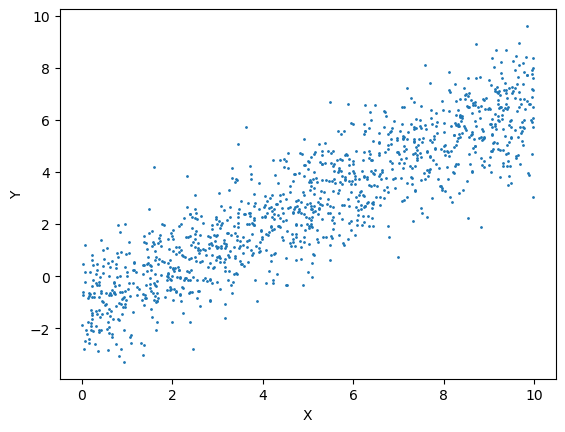

In [6]:
rand = default_rng(26)

# we randomly generate 1200 values for X
X = rand.uniform(low=0.0, high=10.0, size=(1200,))

# to test, we define slope is 0.3, intercept is -1.25
# Now y = slope * X + intercept + rand.normal(loc=0,0, scale=1.0, size=(1200,))
y = 0.8 * X - 1.25 + rand.normal(loc=0.0, scale=1.2, size=(1200,))

# visualize our initial data
plt.scatter(X, y,s=1)
mpl.rcParams['figure.dpi'] = 400 # dpi = dots per inch
plt.xlabel('X')
plt.ylabel('Y')


In [7]:
from sklearn.linear_model import LogisticRegression

log_two = LogisticRegression(fit_intercept=True, copy_X=True, n_jobs=None)

log_two.fit(X.reshape(-1,1), y)

print(log_two.coef_)
print(log_two.intercept_)

[0.79633037]
-1.2125127353865155


Text(0, 0.5, 'y')

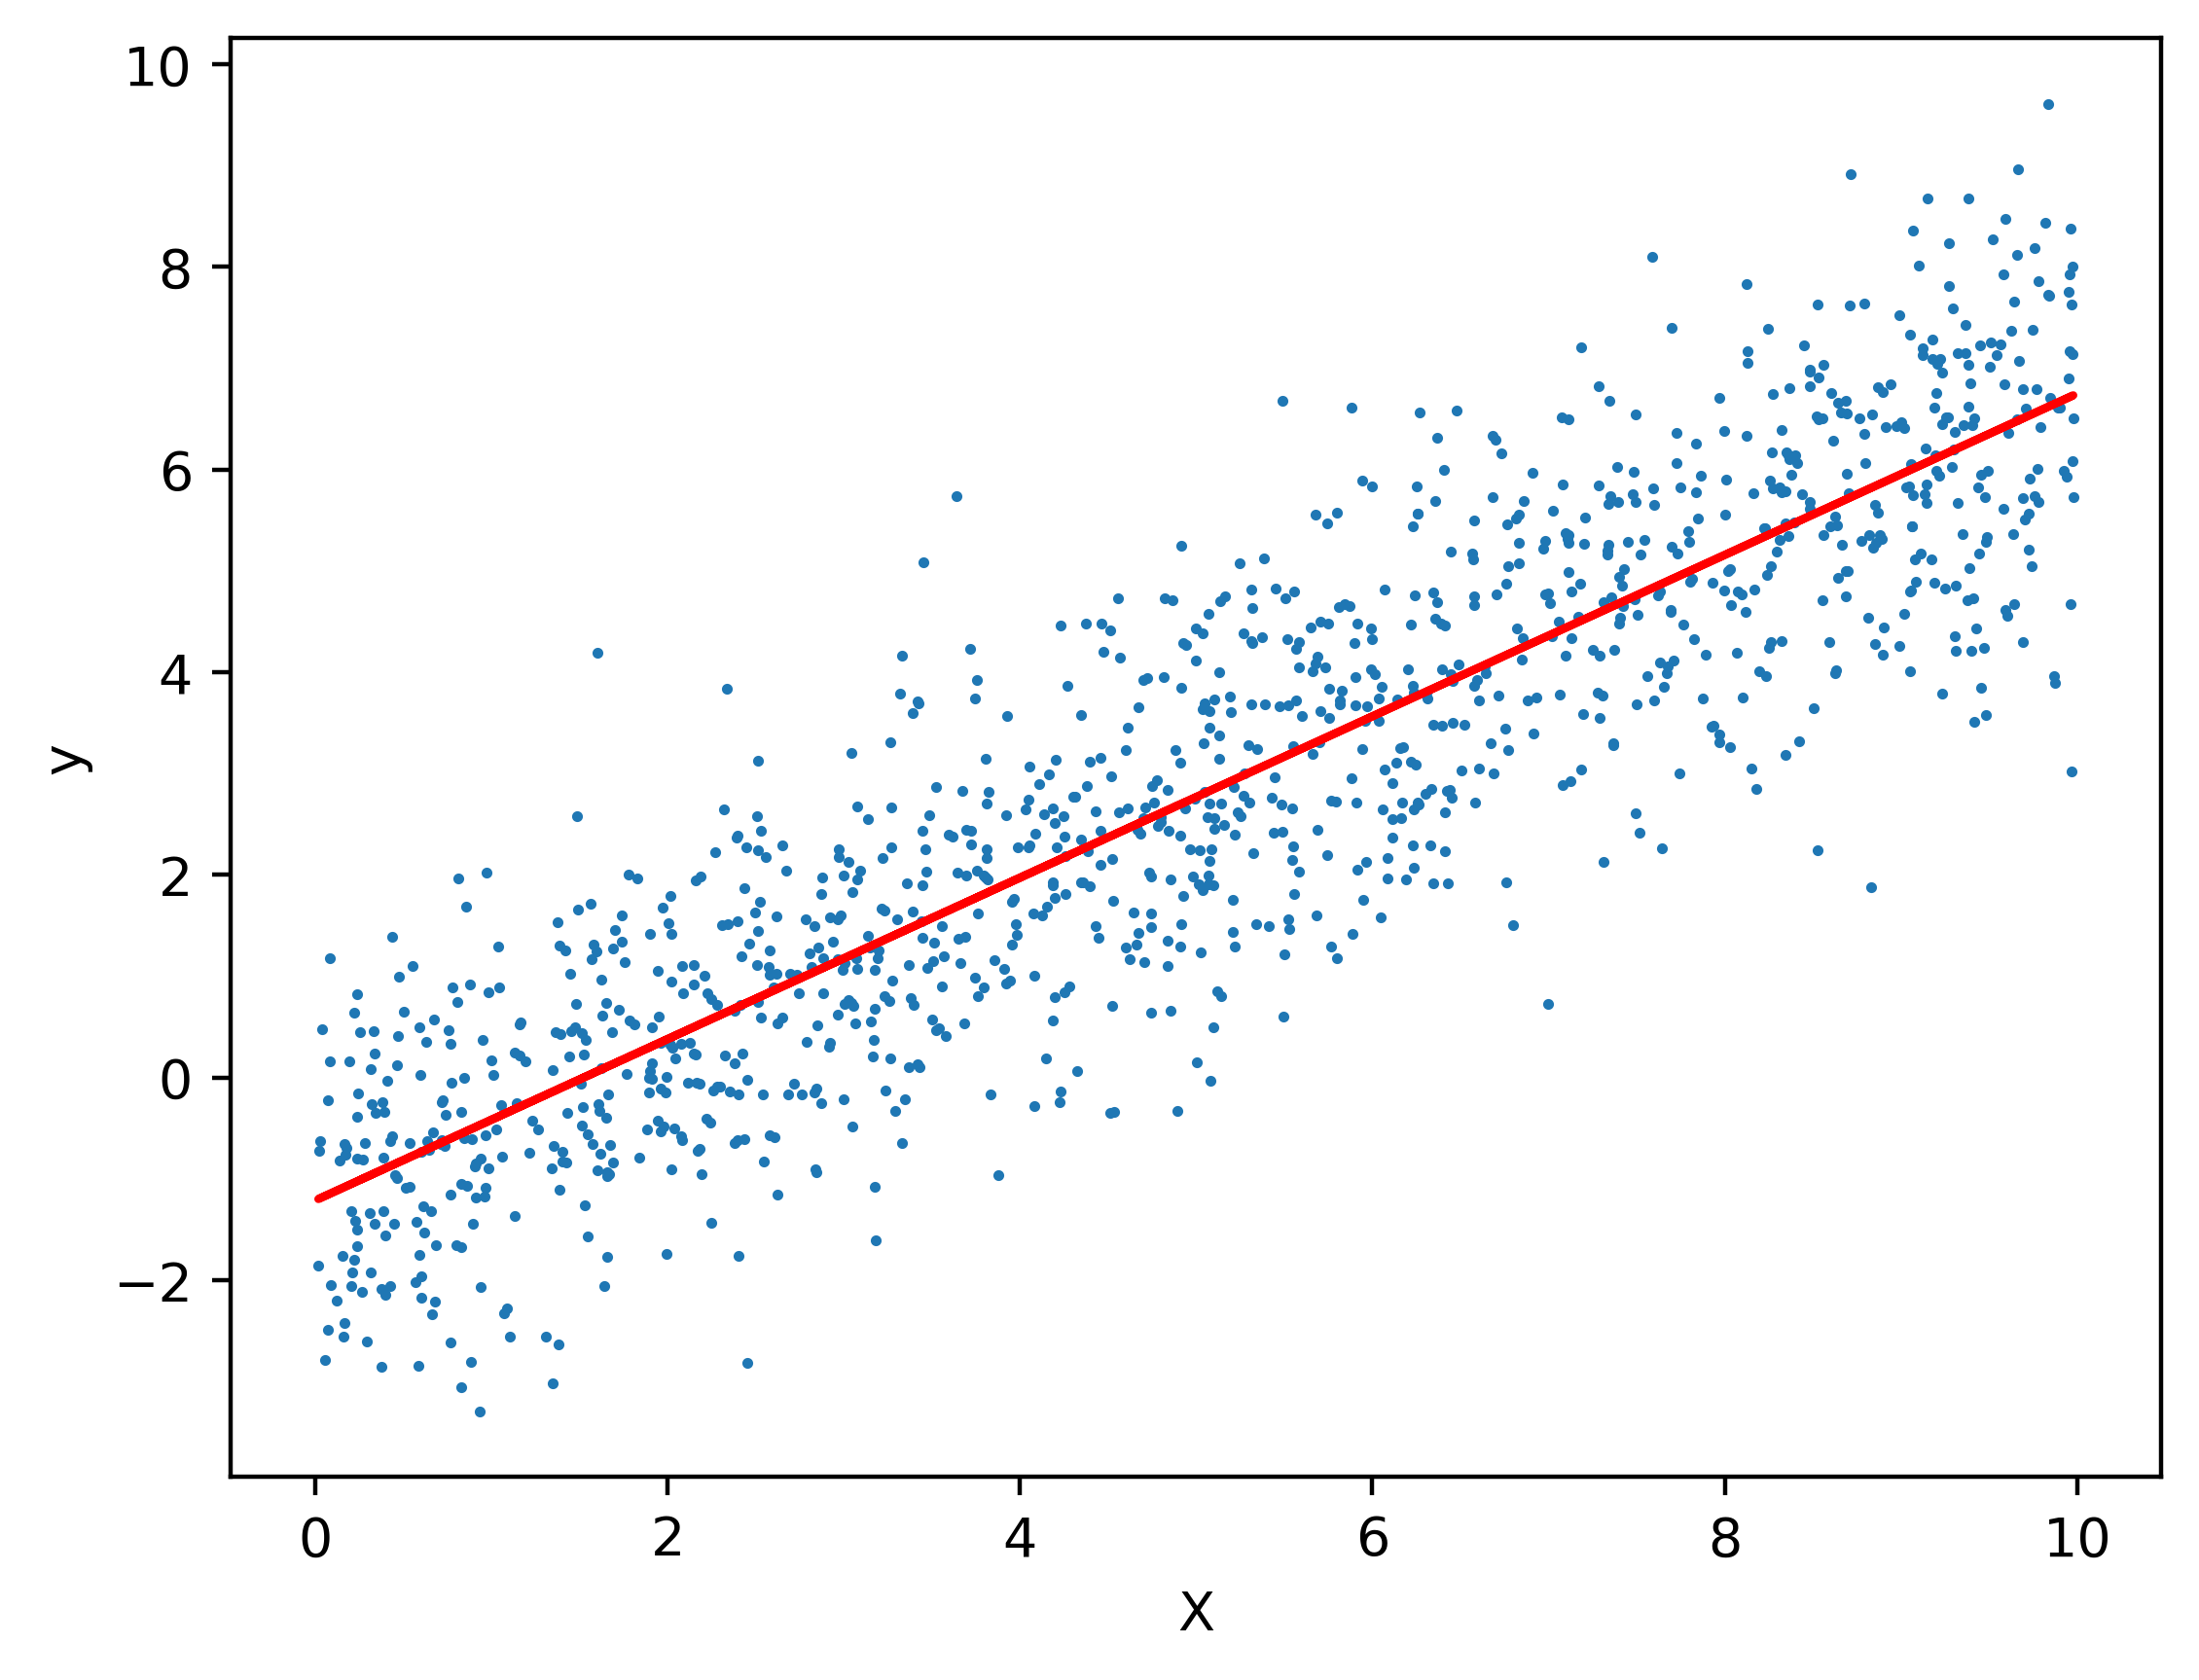

In [8]:
# Perform prediction
y_pred = log_two.predict(X.reshape(-1,1))

# graphing the regression line in the original distribution
plt.scatter(X, y,s=1)
plt.plot(X, y_pred, 'r')
plt.xlabel('X') 
plt.ylabel('y')

#### Split Data Set


In [9]:
from sklearn.model_selection import train_test_split

# split the data set into test and train sets.
# test_size specifies that we keep 20% of data for testing
X_train, X_test, y_train, y_test = train_test_split(
    df['EDUCATION'].values.reshape(-1, 1), df['default payment next month'].values, test_size=0.2, random_state=24)

In [14]:
# run the model and predict
log_three = LogisticRegression(C=0.1, solver='liblinear')

log_three.fit(X_train, y_train)

y_pred = log_three.predict(X_test)

log_three.score(X_test, y_test)


0.7834239639977498

In [19]:
# evaluate the result using confusion matrix
from sklearn import metrics 
P = sum(y_test)
TP = sum((y_test==1) & (y_pred==1))
TPR = TP/P
FN = sum( (y_test==1) & (y_pred==0) )
FNR = FN/P
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

Text(0, 0.5, 'Count')

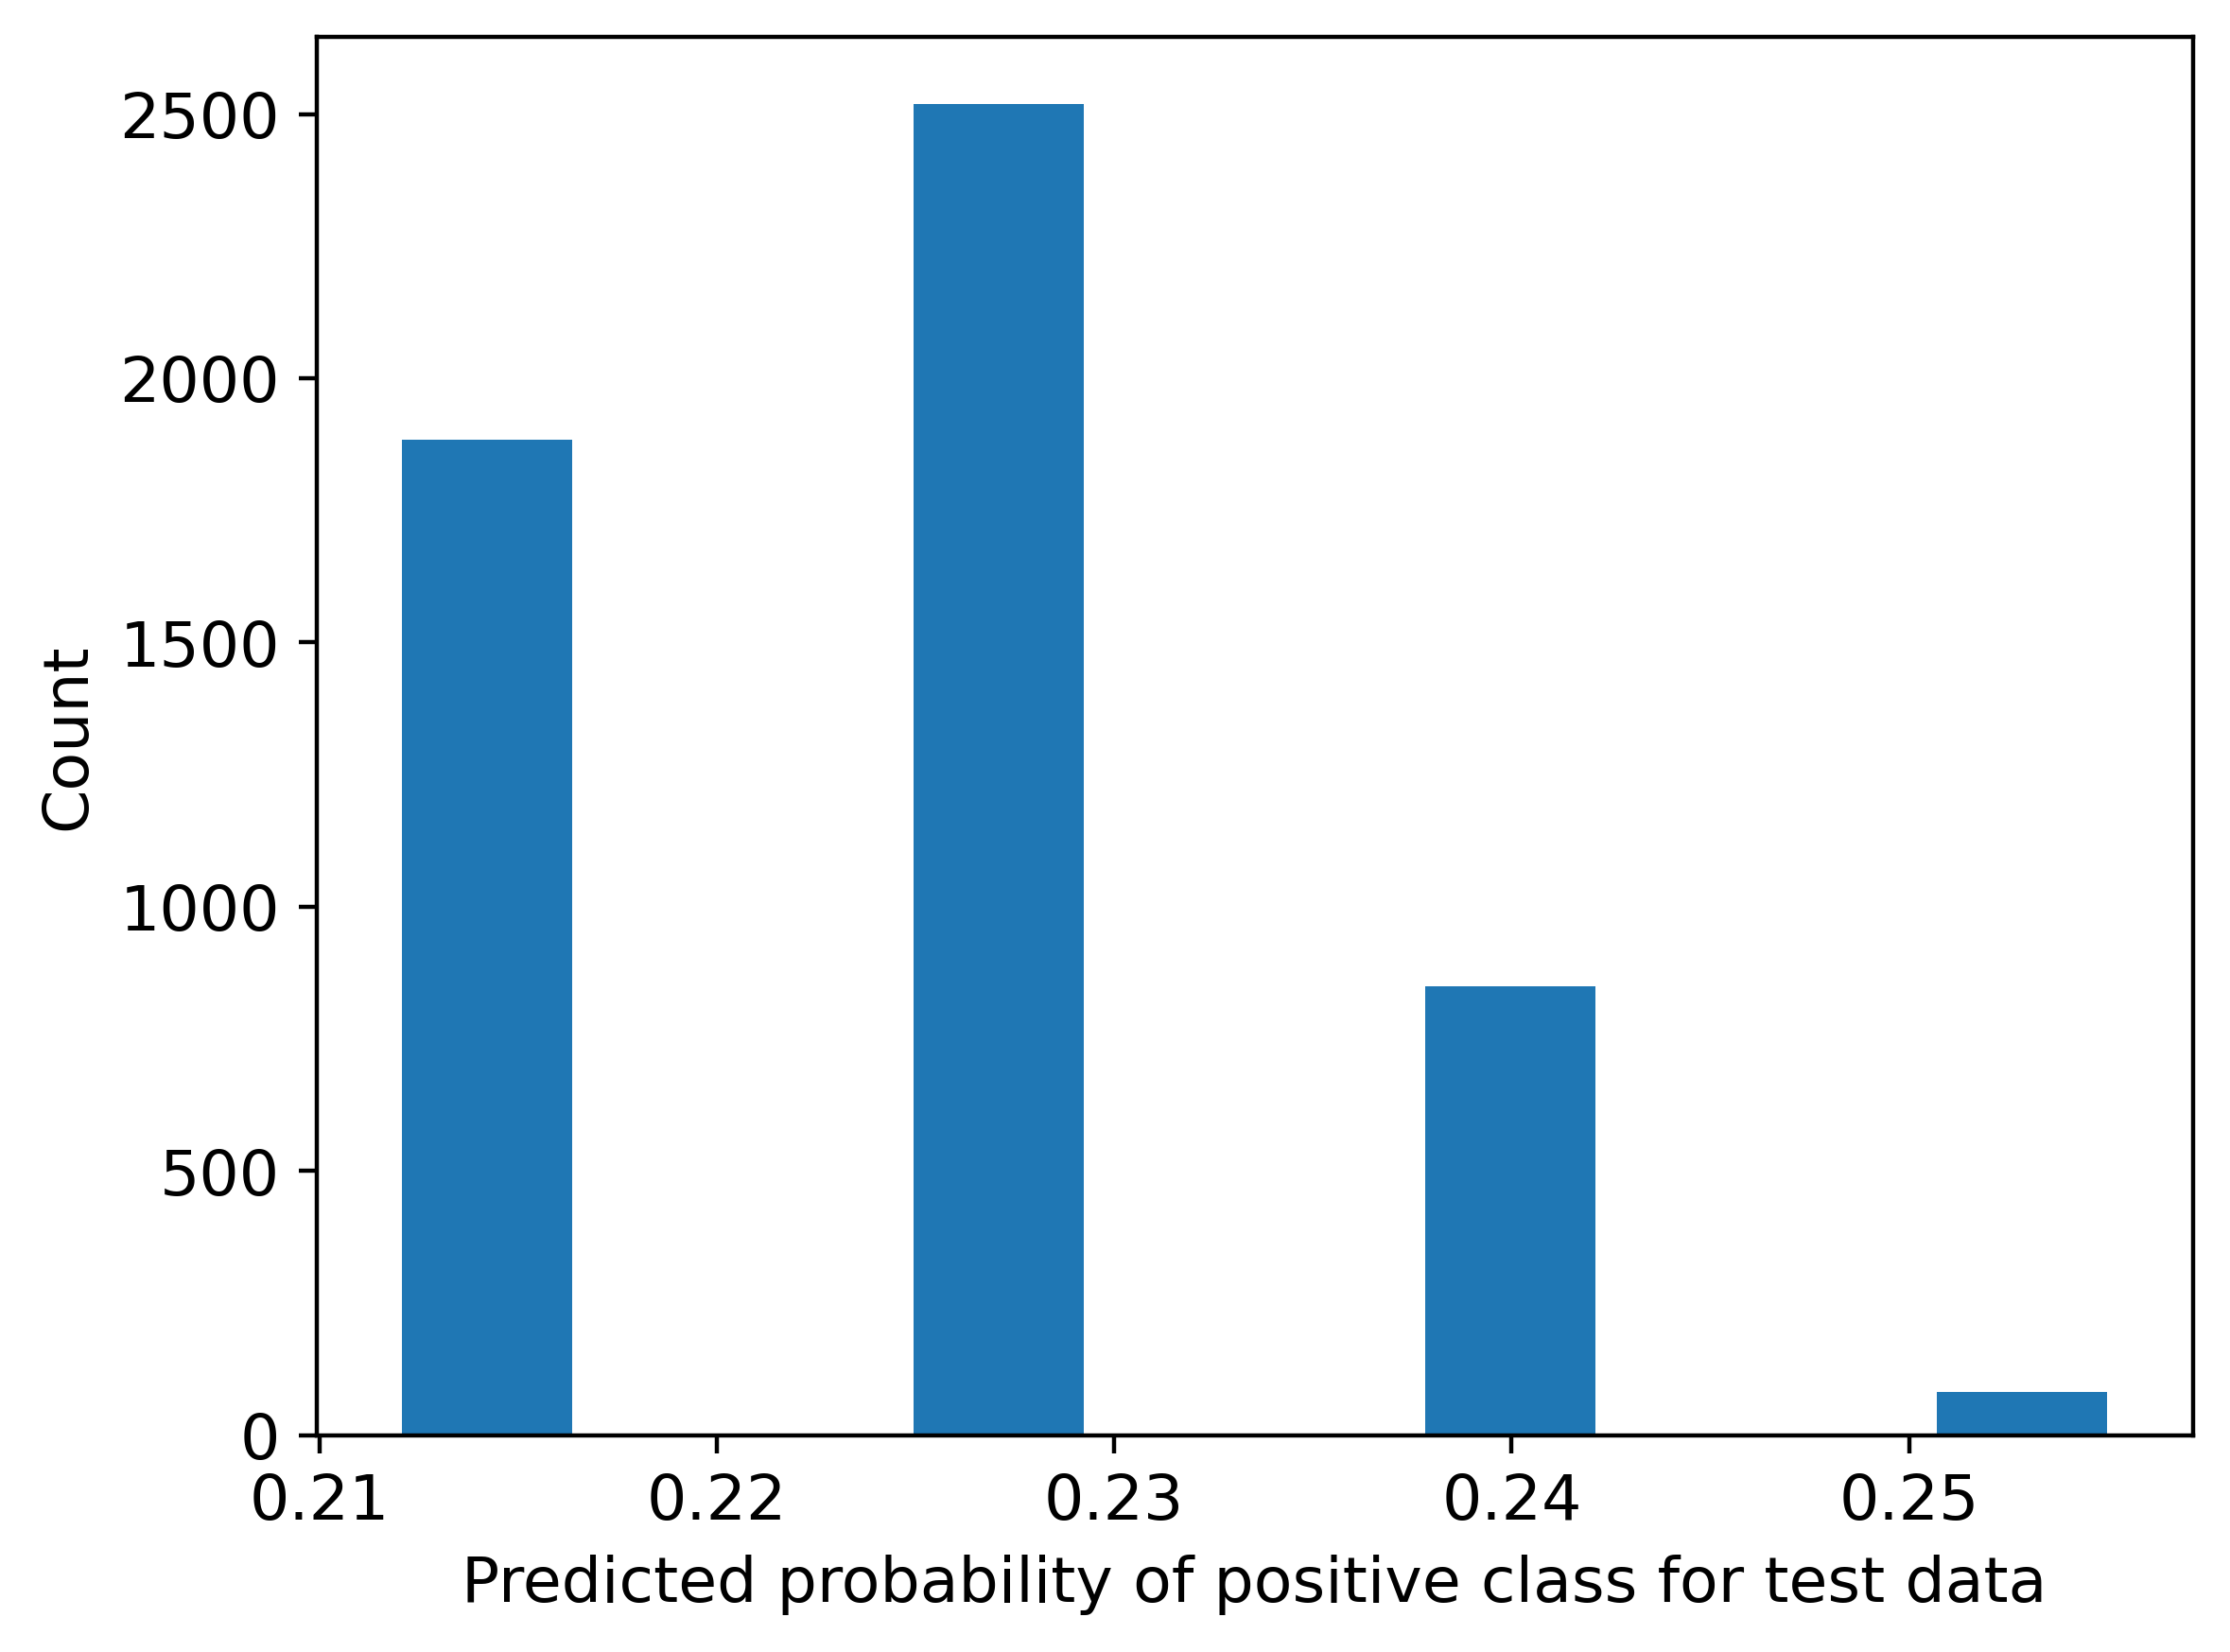

In [24]:
y_pred_proba = log_three.predict_proba(X_test)
pos_proba = y_pred_proba[:,1]
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for test data')
plt.ylabel('Count')

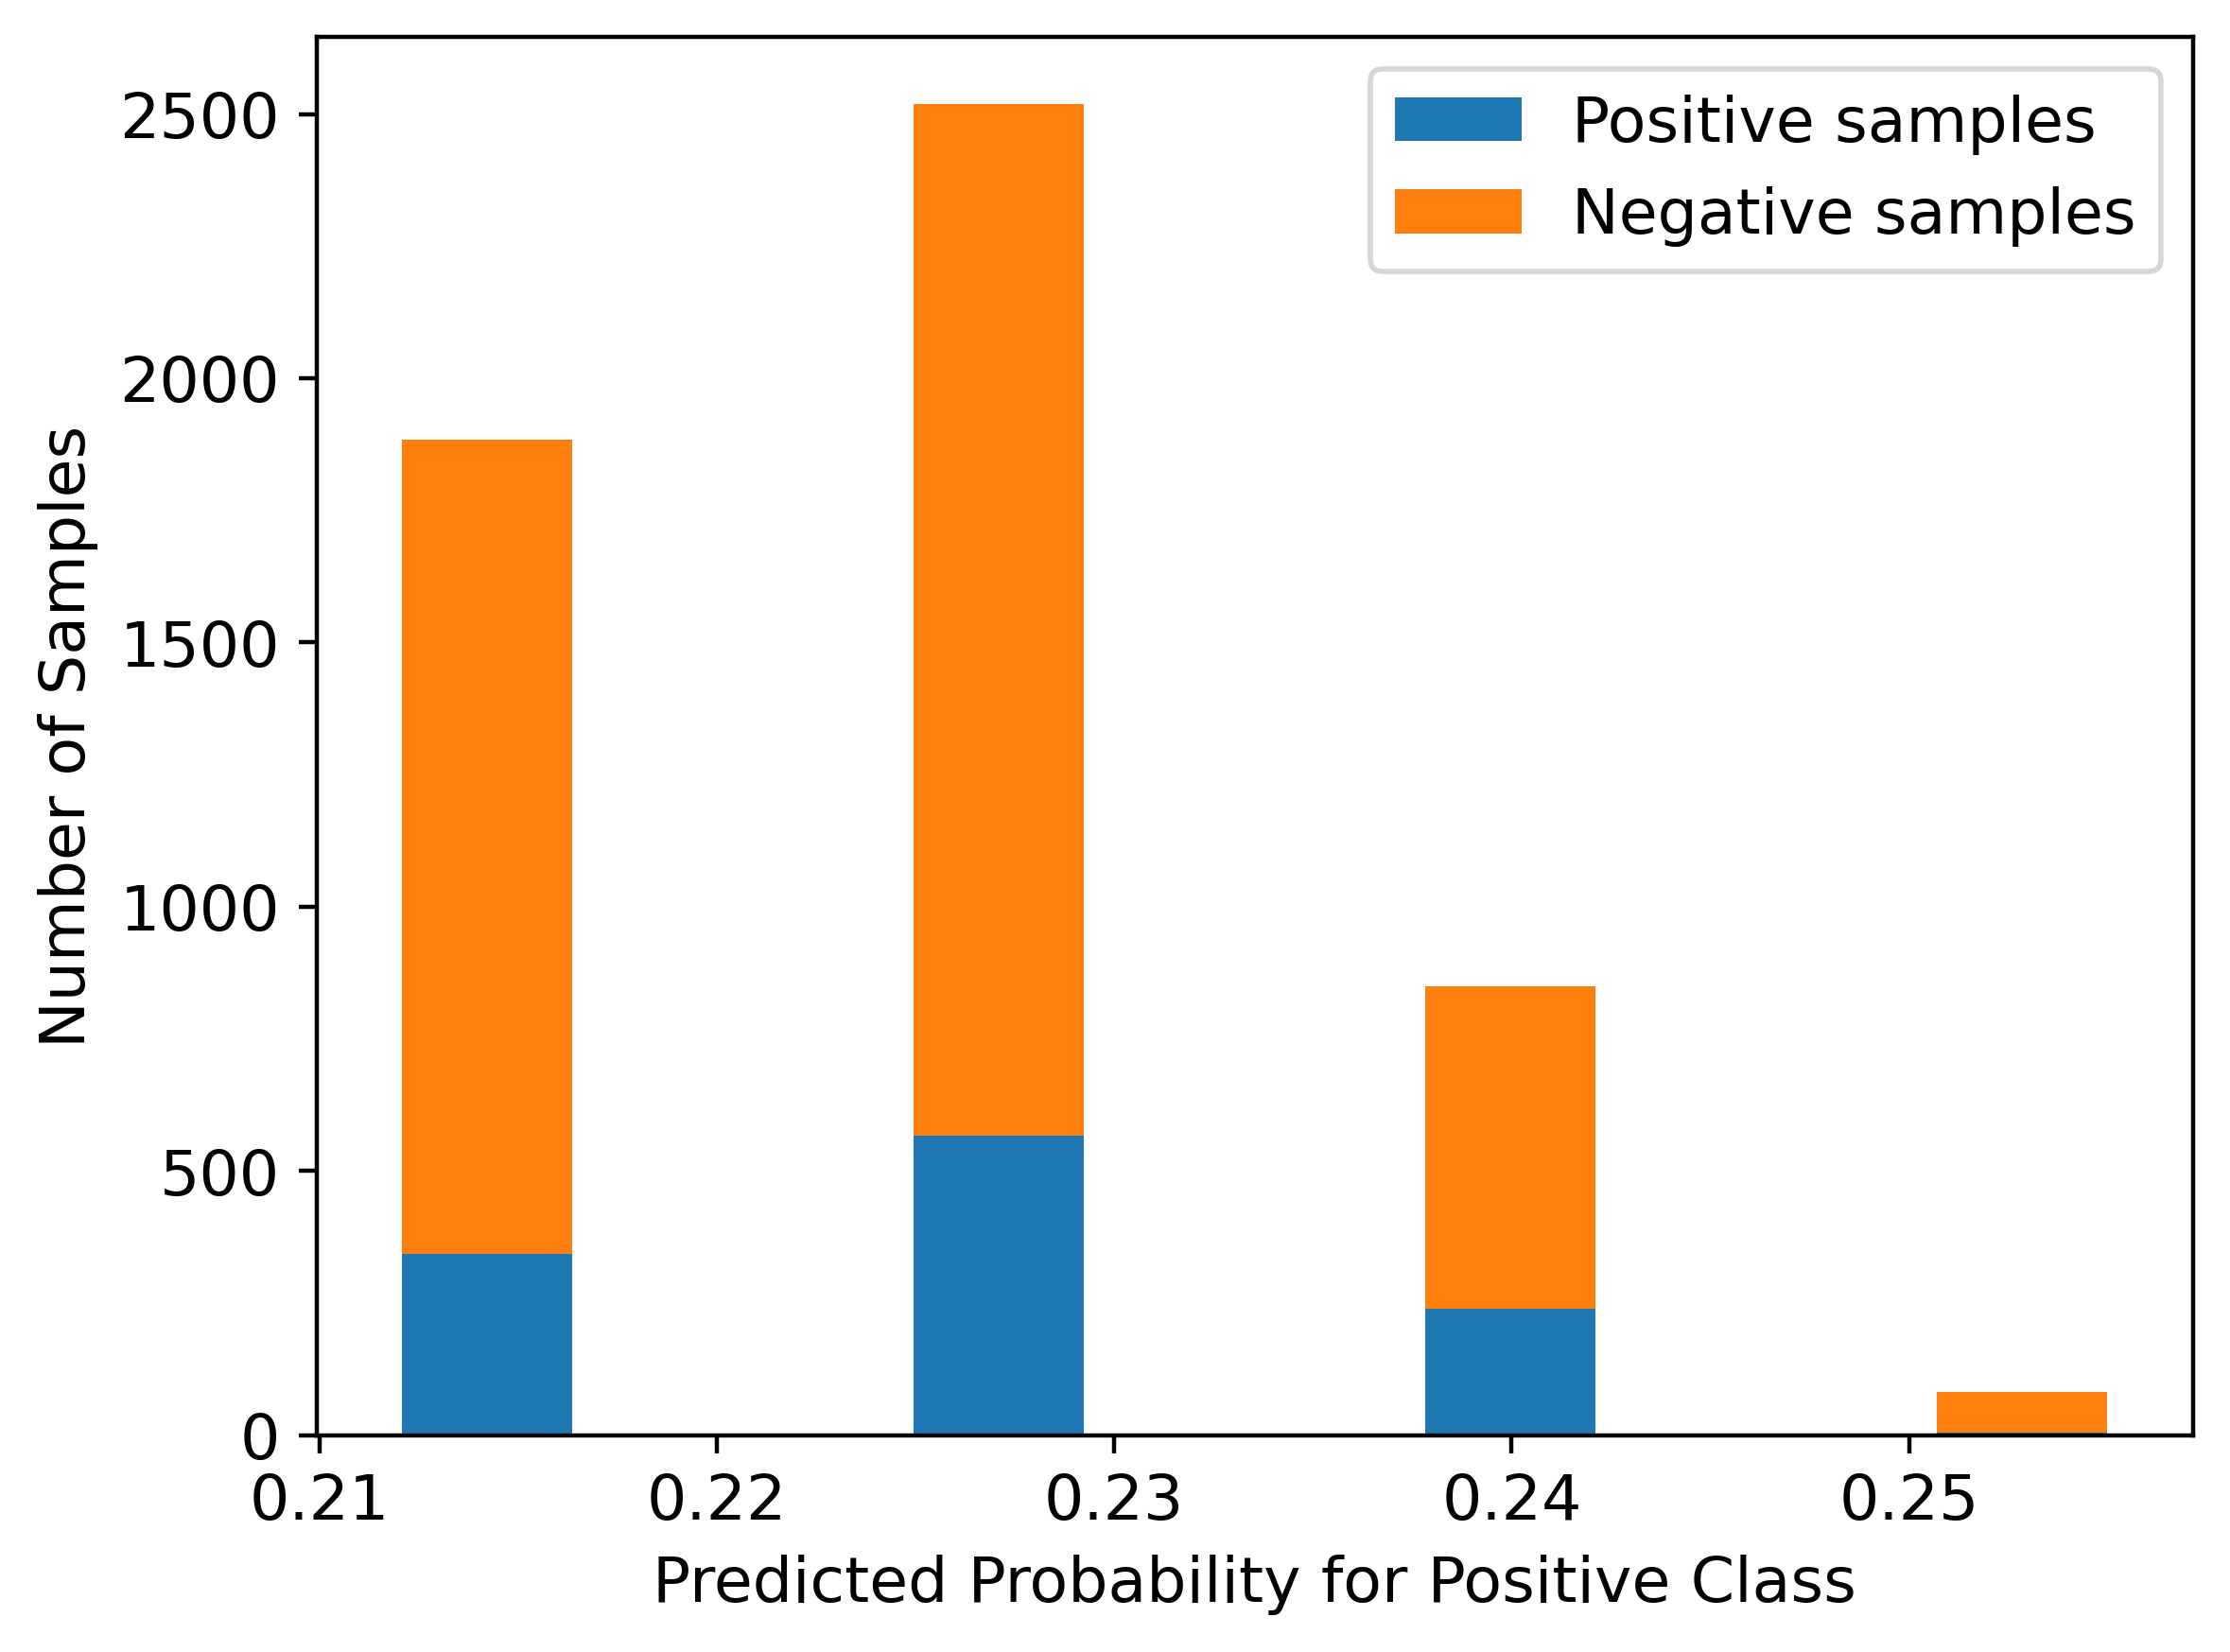

In [26]:
# Isolate the predicted probabilities for positive and negative samples
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

# plot a stacked histogram
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted Probability for Positive Class')
plt.ylabel('Number of Samples')
plt.show()

### Receiver Operating Characteristic (ROC) curve
It is a plot of the pairs of TPRs ( y-axis) and FPRs ( x-axis) that result from lowering the threshold down from 1 all the way to 0. Now, we will examine the ROC curve for the sample above

0.5434650477972642


Text(0.5, 1.0, 'ROC curve')

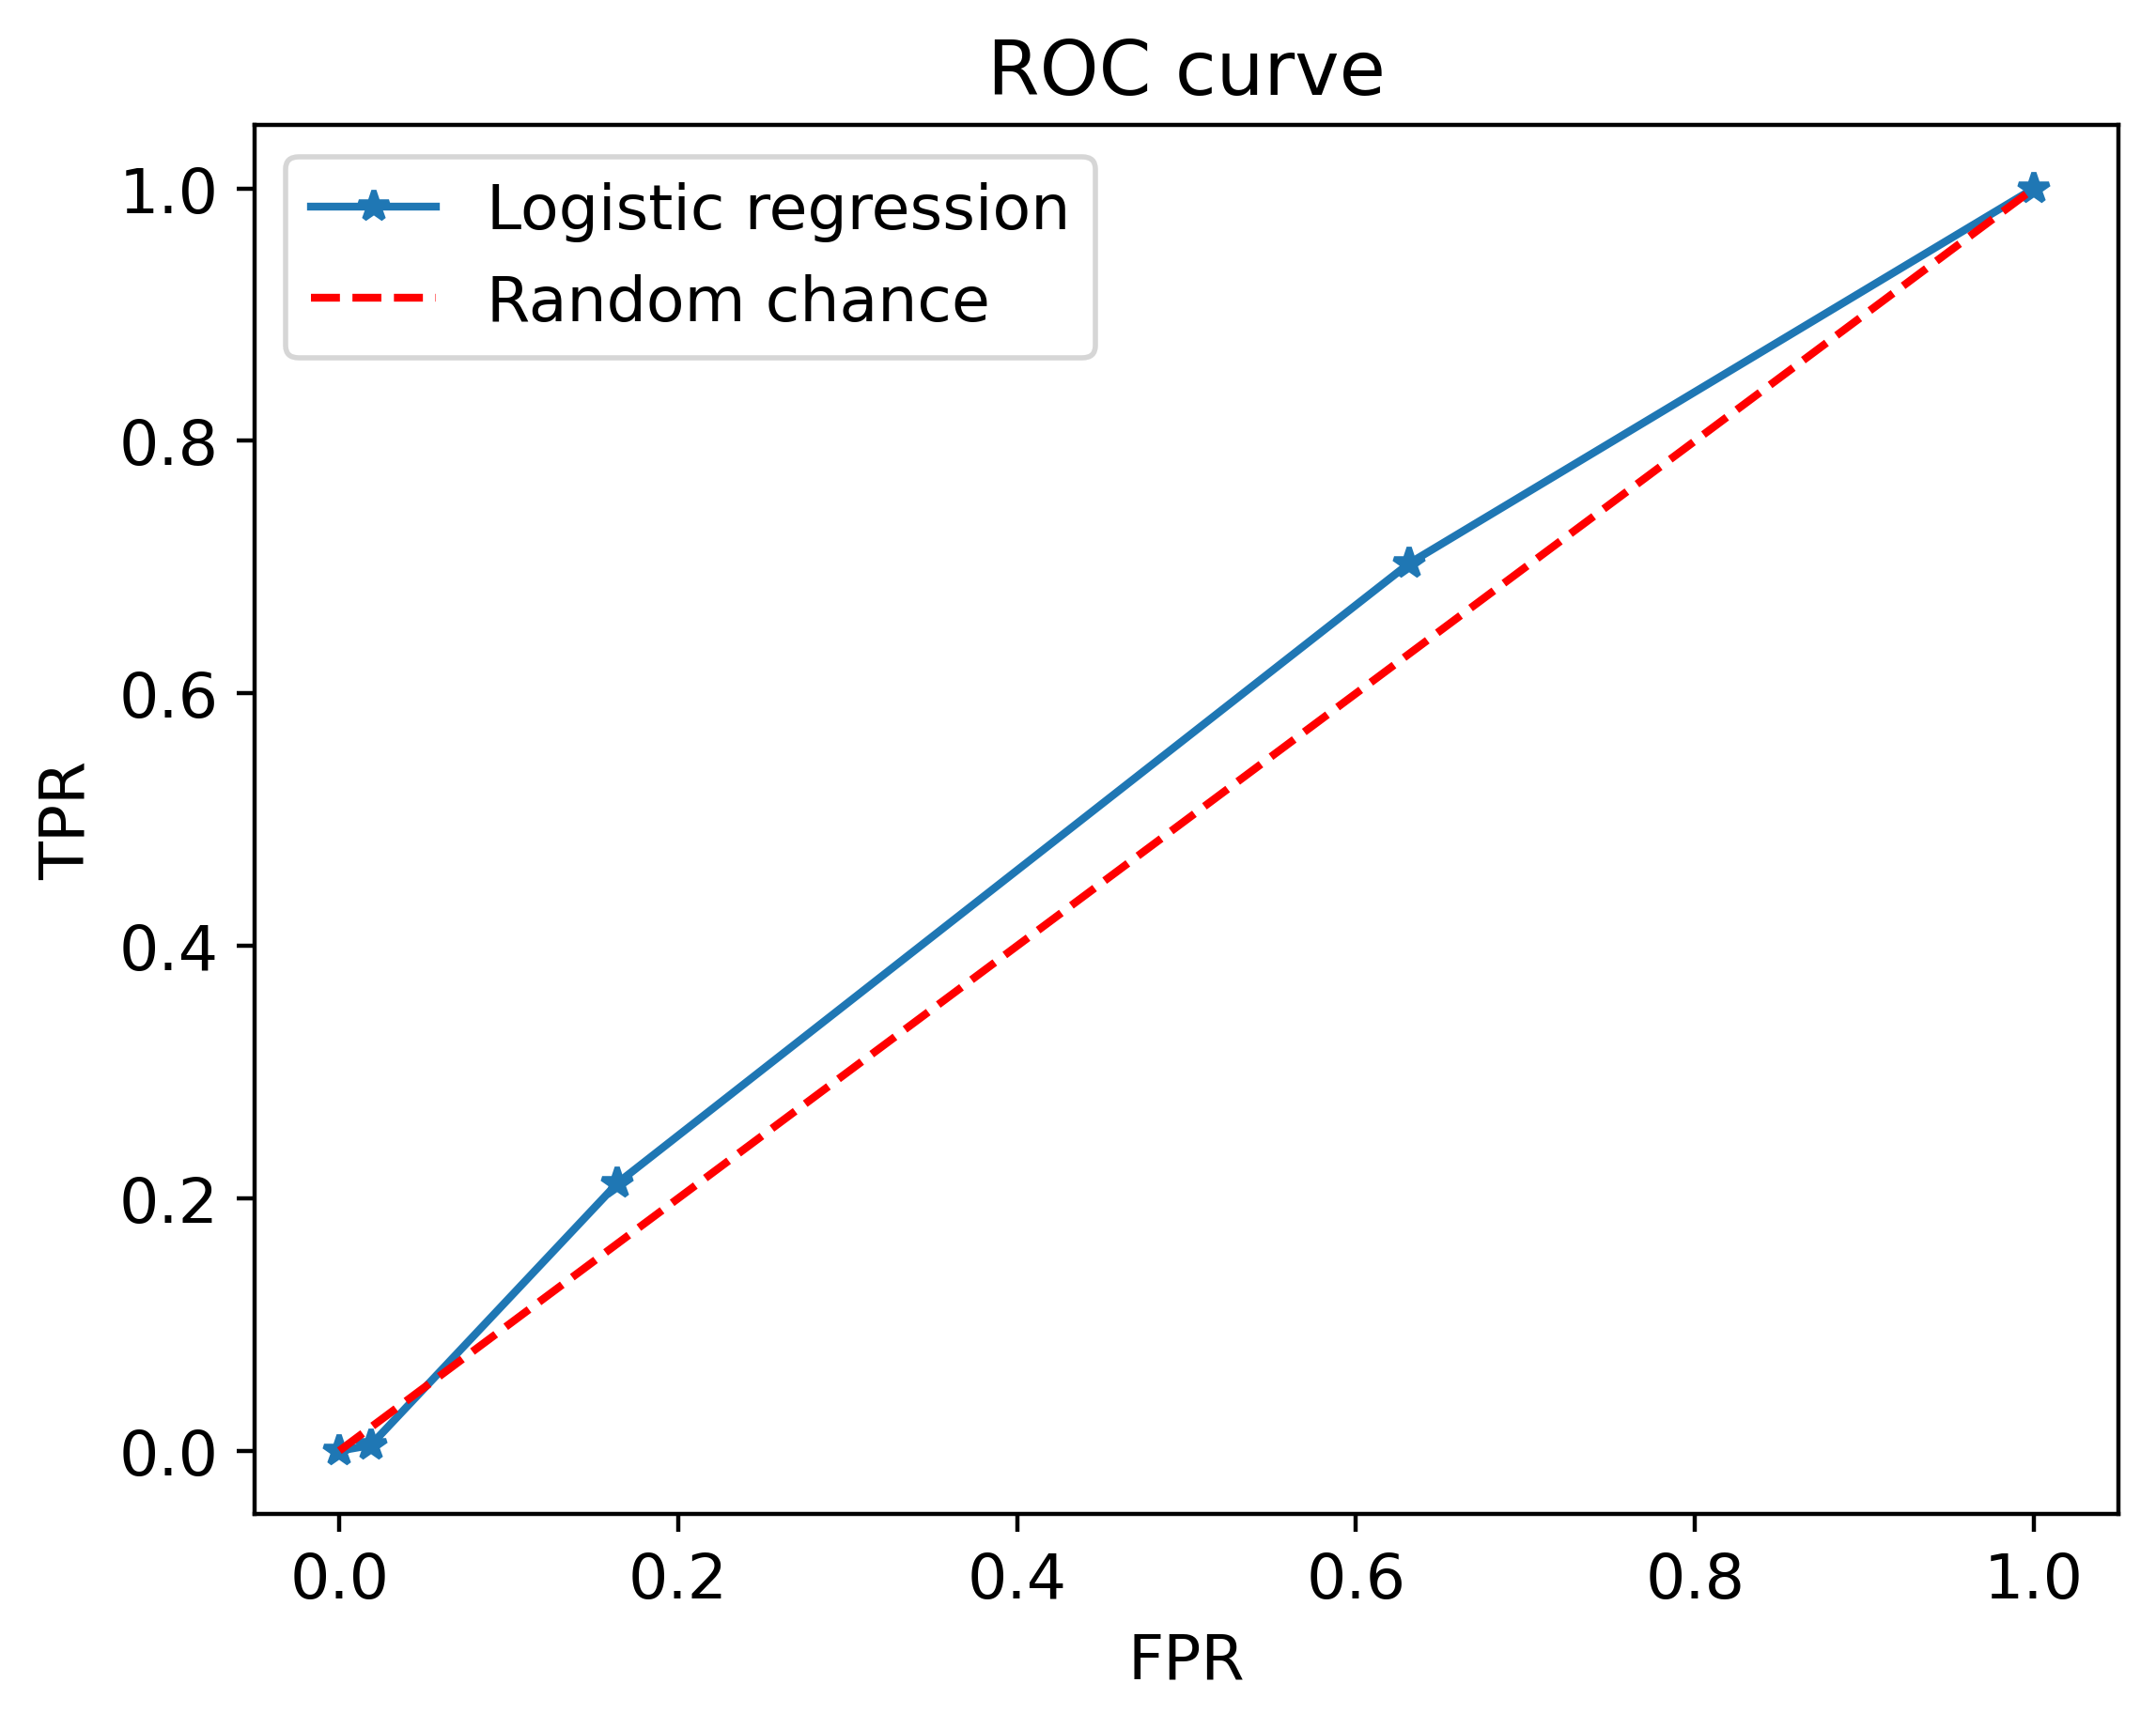

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
print(metrics.roc_auc_score(y_test, pos_proba))
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance']) 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

#### Activity: Review the Regression Process

In [30]:
example_lr = LogisticRegression(C=0.1, class_weight=None,
                                dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100,
                                multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None,
                                solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)

X_train_act, X_test_act, Y_train_act, Y_test_act = train_test_split(
    df['LIMIT_BAL'].values.reshape(-1,1),
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

example_lr.fit(X_train_act, Y_train_act)

y_test_pred_proba = example_lr.predict_proba(X_test_act)
fpr2, tpr2, threshold2 = metrics.roc_curve(Y_test_act, y_test_pred_proba[:, 1])
print(metrics.roc_auc_score(Y_test_act, y_test_pred_proba[:, 1]))

0.6201990844642832


Text(0.5, 1.0, 'ROC curve for Regression with LIMIT_BAL feature')

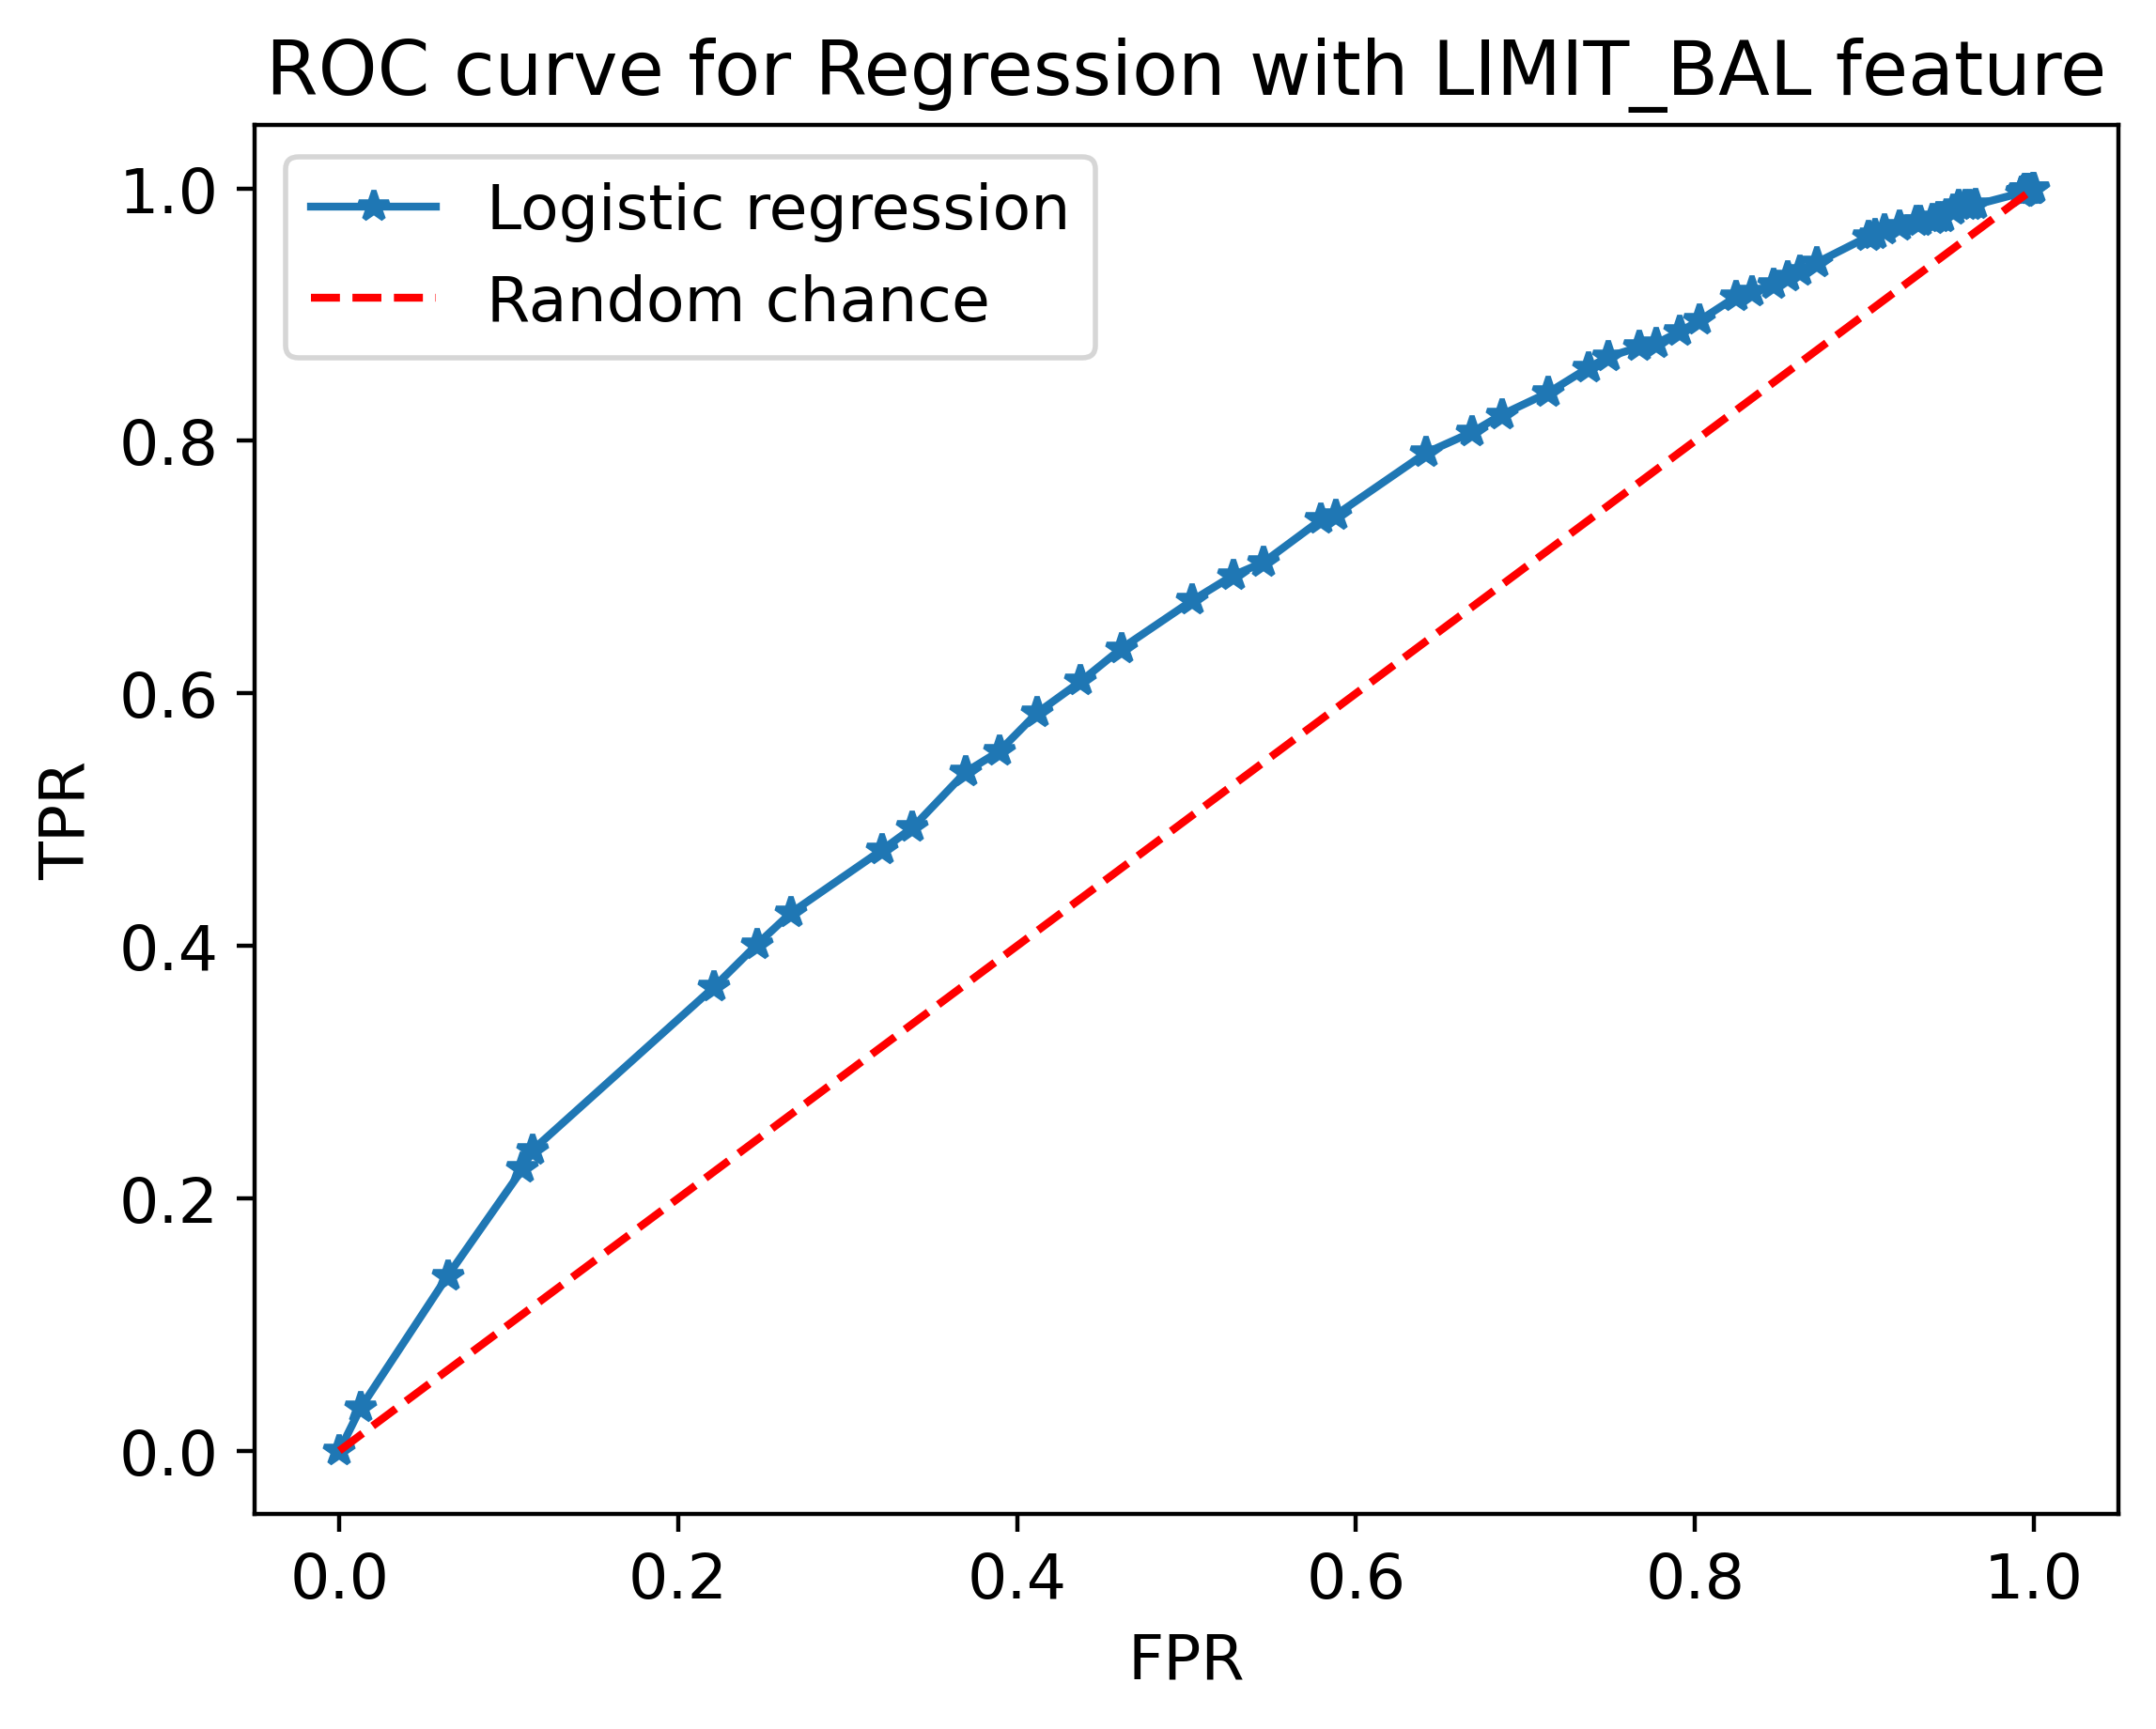

In [31]:
# graph the result
plt.plot(fpr2, tpr2, '*-')
plt.plot([0,1],[0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance']) 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Regression with LIMIT_BAL feature')

(0.0, 1.0)

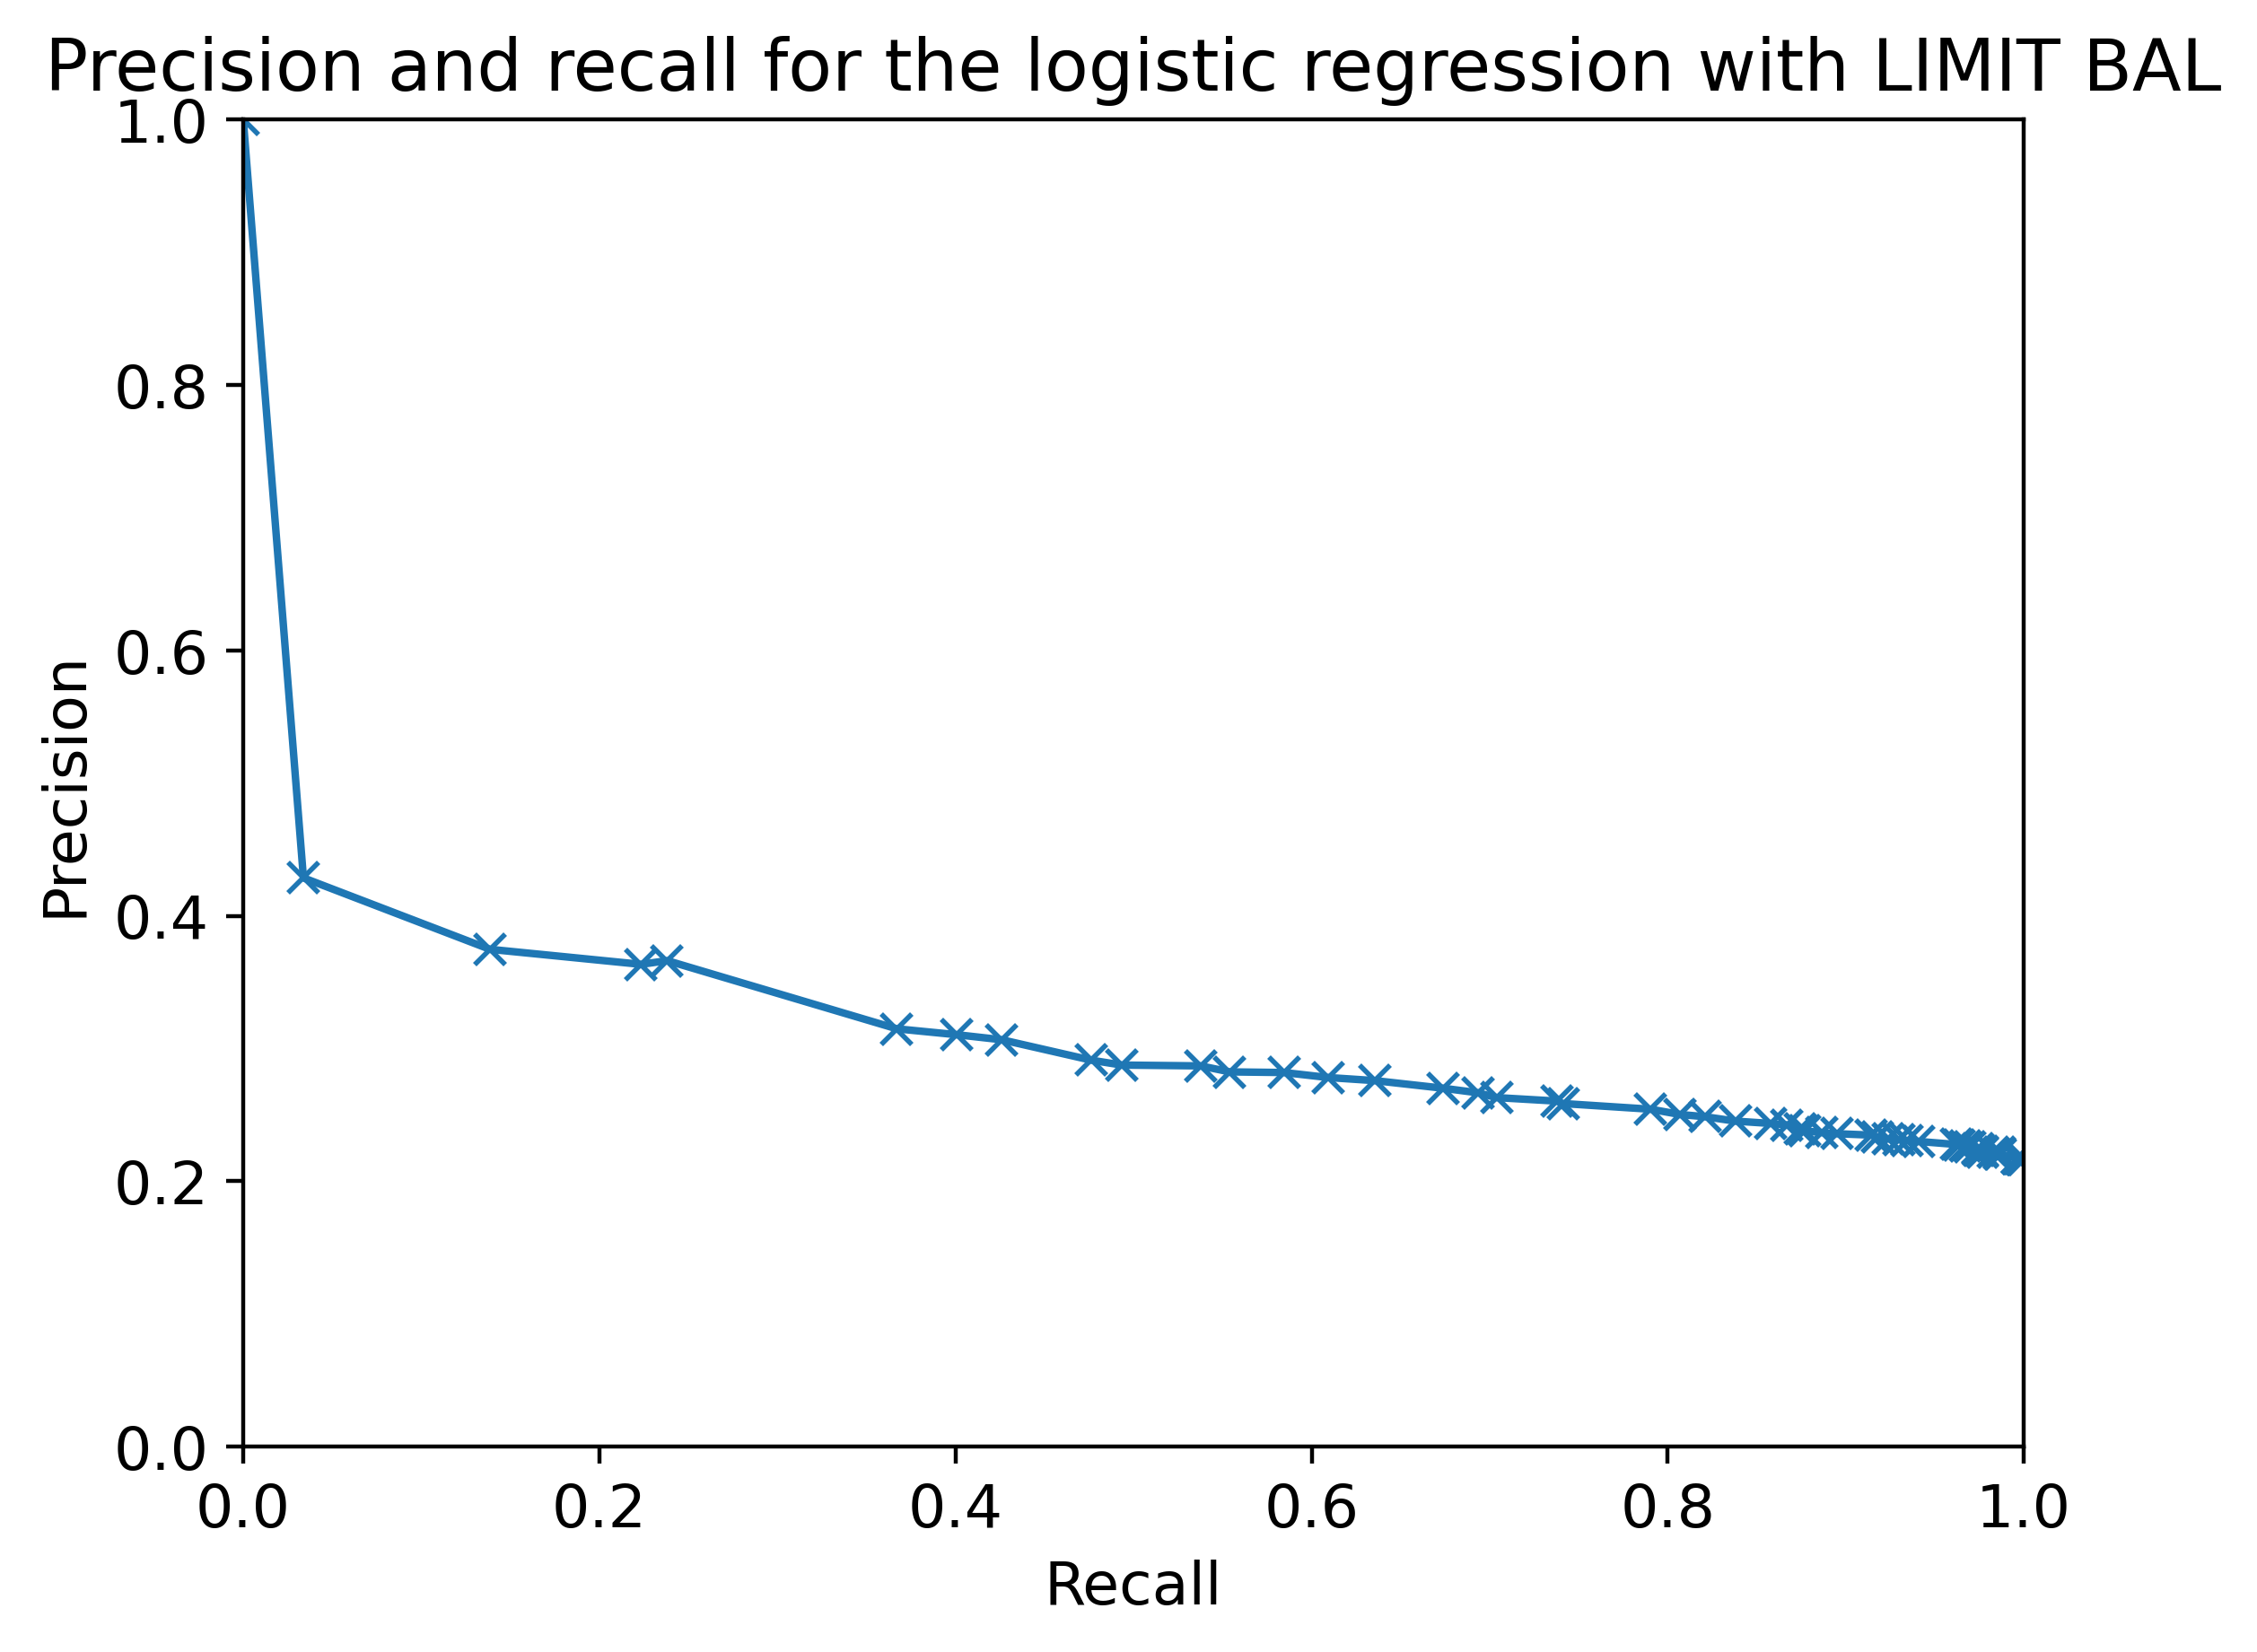

In [33]:
precision, recall, thresh_3= \
metrics.precision_recall_curve(Y_test_act, y_test_pred_proba[:,1])
plt.plot(recall, precision,'-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title( 'Precision and recall for the logistic regression with LIMIT BAL')
plt.xlim([0,1])
plt.ylim([0, 1])